In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import csv
import seaborn as sns
import numpy as np

In [2]:
! gdown 1lM7HpS2p7BmgdjdBdDv6UITYAoJ-TqjS
data = pd.read_csv('data2.txt', header=None, names = ["x1","x2","y"])
data.head()

Downloading...
From: https://drive.google.com/uc?id=1lM7HpS2p7BmgdjdBdDv6UITYAoJ-TqjS
To: /content/data2.txt
100% 2.35k/2.35k [00:00<00:00, 3.85MB/s]


,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [5]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    pos = data['y'] == 1
    neg = data['y'] == 0
 
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='green', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg]['x1'], data[neg]['x2'], c='pink', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

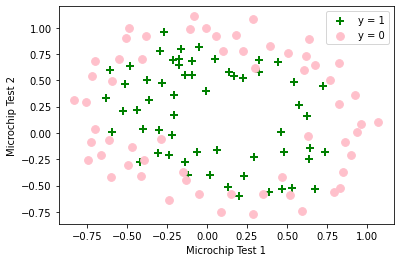

In [6]:
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')


In [7]:
n = data.shape[1]-1
x = data[data.columns[0:n]]
X = x.values

y = data[data.columns[n:n+1]]
y = y.values
X

array([[ 0.051267 ,  0.69956  ],
       [-0.092742 ,  0.68494  ],
       [-0.21371  ,  0.69225  ],
       [-0.375    ,  0.50219  ],
       [-0.51325  ,  0.46564  ],
       [-0.52477  ,  0.2098   ],
       [-0.39804  ,  0.034357 ],
       [-0.30588  , -0.19225  ],
       [ 0.016705 , -0.40424  ],
       [ 0.13191  , -0.51389  ],
       [ 0.38537  , -0.56506  ],
       [ 0.52938  , -0.5212   ],
       [ 0.63882  , -0.24342  ],
       [ 0.73675  , -0.18494  ],
       [ 0.54666  ,  0.48757  ],
       [ 0.322    ,  0.5826   ],
       [ 0.16647  ,  0.53874  ],
       [-0.046659 ,  0.81652  ],
       [-0.17339  ,  0.69956  ],
       [-0.47869  ,  0.63377  ],
       [-0.60541  ,  0.59722  ],
       [-0.62846  ,  0.33406  ],
       [-0.59389  ,  0.005117 ],
       [-0.42108  , -0.27266  ],
       [-0.11578  , -0.39693  ],
       [ 0.20104  , -0.60161  ],
       [ 0.46601  , -0.53582  ],
       [ 0.67339  , -0.53582  ],
       [-0.13882  ,  0.54605  ],
       [-0.29435  ,  0.77997  ],
       [-0

In [8]:
def mapFeature( x1col, x2col):
    degrees = 10
    out = np.ones( (x1col.shape[0], 1) )
    for i in range(1, degrees+1):
      for j in range(0, i+1):
        topic1 = x1col ** (i-j)
        topic2 = x2col ** (j)
        term  = (topic1 * topic2).reshape( topic1.shape[0], 1 ) 
        out   = np.hstack(( out, term ))
    return out

In [9]:
XX = mapFeature(X[:,0],X[:,1])
print(X.shape, XX.shape)
XX


(118, 2) (118, 66)


array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         1.50756332e-04,  2.05713421e-03,  2.80704704e-02],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         4.16651692e-04, -3.07715393e-03,  2.27261199e-02],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         2.40853745e-03, -7.80174092e-03,  2.52714199e-02],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.33324699e-01, -4.81276442e-01,  9.92723934e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         3.99160874e-05, -6.29489121e-03,  9.92723934e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.08646006e-13, -1.49344370e-14,  7.22631762e-16]])

In [10]:
from scipy.special import expit 
def h(mytheta,myX): 
    return expit(np.dot(myX,mytheta))

In [11]:
def computeCost(mytheta,myX,myy,mylambda = 0.): 

    m = myy.size 

    topic1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    topic2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) 
    return float( (1./m) * ( np.sum(topic1 - topic2) + regterm ) )

In [12]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )        
    g = 1.0/(1.0+np.exp(-z))
    return g

In [13]:
def compute_gradient_logistic(X, y, w):
  m,n = X.shape
  dj_dw = np.zeros((n,))

  for i in range(m):
    f_wb_i = sigmoid(np.dot(X[i], w))                       
    err_i  = f_wb_i  - y[i]                      
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err_i * X[i,j]       
  dj_dw = dj_dw/m                                  
  return dj_dw

In [14]:
import copy
import math
initial_theta = np.zeros(XX.shape[1])
print(initial_theta.shape)
def optimizeRegularizedTheta(mytheta, myX, myy, alpha, num_iters, mylambda=0.):
  m = myX.shape[0]
  J_history = []
  w = copy.deepcopy(mytheta)

  for i in range(num_iters):
    dj_dw = compute_gradient_logistic(myX, myy, w)   
    w = w*(1-alpha*(mylambda/m)) - alpha * dj_dw              

    if i<100000:  
        J_history.append( computeCost(w, myX, myy, mylambda) )

    if i% math.ceil(num_iters / 10) == 0:
        print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
  return w, min(J_history)
    
theta, mincost = optimizeRegularizedTheta(initial_theta,XX,y, 0.1, 100)
print(theta.shape)
print(mincost)

(66,)
Iteration    0: Cost 0.691100342525338   
Iteration   10: Cost 0.6745247304834239   
Iteration   20: Cost 0.662429140756798   
Iteration   30: Cost 0.6527223265301214   
Iteration   40: Cost 0.6444403143538936   
Iteration   50: Cost 0.6371093503528475   
Iteration   60: Cost 0.6304730545334474   
Iteration   70: Cost 0.6243774784919752   
Iteration   80: Cost 0.6187210453052703   
Iteration   90: Cost 0.6134315346366914   
(66,)
0.6089396397803091


In [18]:
import copy
import math
initial_theta = np.zeros(XX.shape[1])
print(initial_theta.shape)

def optimizeRegularizedTheta(mytheta, myX, myy, alpha, num_iters, mylambda=0.):
  m = myX.shape[0]
  J_history = []
  w = copy.deepcopy(mytheta)

  for i in range(num_iters):
    dj_dw = compute_gradient_logistic(myX, myy, w)   

    w = w*(1-alpha*(mylambda/m)) - alpha * dj_dw              
  
    if i<100000:      
        J_history.append( computeCost(w, myX, myy, mylambda) )

  
    if i% math.ceil(num_iters / 10) == 0:
        print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
  return w, min(J_history)
    
theta, mincost = optimizeRegularizedTheta(initial_theta,XX,y, 0.1, 100)
print(theta.shape)
print(mincost)

(66,)
Iteration    0: Cost 0.691100342525338   
Iteration   10: Cost 0.6745247304834239   
Iteration   20: Cost 0.662429140756798   
Iteration   30: Cost 0.6527223265301214   
Iteration   40: Cost 0.6444403143538936   
Iteration   50: Cost 0.6371093503528475   
Iteration   60: Cost 0.6304730545334474   
Iteration   70: Cost 0.6243774784919752   
Iteration   80: Cost 0.6187210453052703   
Iteration   90: Cost 0.6134315346366914   
(66,)
0.6089396397803091


In [20]:
import math
import copy
initial_theta = np.zeros(XX.shape[1])
print(initial_theta.shape)

def optimizeRegularizedTheta(mytheta, myX, myy, alpha, num_iters, mylambda=0.):
  m = myX.shape[0]
  J_history = []
  w = copy.deepcopy(mytheta)

  for i in range(num_iters):
    dj_dw = compute_gradient_logistic(myX, myy, w)   

    w = w*(1-alpha*(mylambda/m)) - alpha * dj_dw              
  
    if i<100000:     
        J_history.append( computeCost(w, myX, myy, mylambda) )

    if i% math.ceil(num_iters / 10) == 0:
        print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
  return w, min(J_history)
    
theta, mincost = optimizeRegularizedTheta(initial_theta,XX,y, 0.1, 100)
print(theta.shape)
print(mincost)

(66,)
Iteration    0: Cost 0.691100342525338   
Iteration   10: Cost 0.6745247304834239   
Iteration   20: Cost 0.662429140756798   
Iteration   30: Cost 0.6527223265301214   
Iteration   40: Cost 0.6444403143538936   
Iteration   50: Cost 0.6371093503528475   
Iteration   60: Cost 0.6304730545334474   
Iteration   70: Cost 0.6243774784919752   
Iteration   80: Cost 0.6187210453052703   
Iteration   90: Cost 0.6134315346366914   
(66,)
0.6089396397803091


In [23]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    alpha = .1
    iters = 1000

    theta, mincost = optimizeRegularizedTheta(mytheta, myX, myy, alpha, iters, mylambda)
    print(theta, '\n\nCost : ', mincost, '\n \n ')
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

Iteration    0: Cost 0.691100342525338   
Iteration  100: Cost 0.6084547570625648   
Iteration  200: Cost 0.5695610710258278   
Iteration  300: Cost 0.5416710089367659   
Iteration  400: Cost 0.5198661671992133   
Iteration  500: Cost 0.5021505299816056   
Iteration  600: Cost 0.4873998933845835   
Iteration  700: Cost 0.4748894276765046   
Iteration  800: Cost 0.4641208383686552   
Iteration  900: Cost 0.4547377973709433   
[ 1.26417001e+00  7.35785885e-01  1.34575328e+00 -2.05425981e+00
 -9.41669252e-01 -1.20175477e+00  2.36484563e-01 -4.14345656e-01
 -4.16023101e-01 -1.18983482e-02 -1.50604511e+00 -8.73088139e-02
 -6.65501535e-01 -2.97257007e-01 -1.06321371e+00 -1.61310274e-01
 -2.42833027e-01 -7.79800864e-02 -2.93290541e-01 -3.33313239e-01
 -3.29543875e-01 -1.06496165e+00  5.95148218e-03 -3.24248588e-01
 -5.39771789e-03 -3.48586876e-01 -1.63715987e-01 -8.23557181e-01
 -3.06198193e-01 -1.24851523e-01 -5.83636352e-02 -1.27239389e-01
 -5.16787175e-02 -1.85022617e-01 -2.23006646e-01 -4

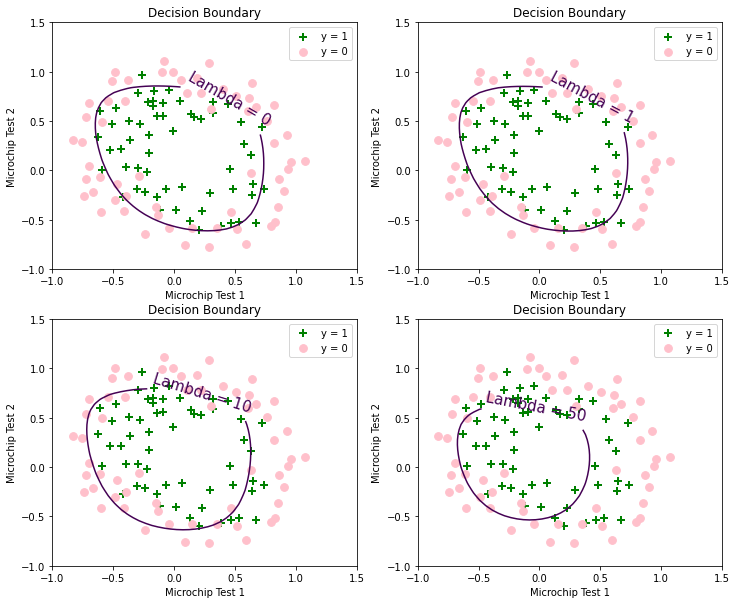

In [24]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta, XX, y, 0.)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,50.)